# ETL on books from Amazon and Flipkart

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Flipkart ETL

In [2]:
flipkart = pd.read_csv('flipkart.csv')
cols_to_drop = ['URL']
flipkart = flipkart.drop(cols_to_drop, axis=1)
flipkart.columns = [col.strip().lower() for col in flipkart.columns]
flipkart.head()

,price,title,author,stars,ratings count,reviews count,language,binding,publisher,genre,isbn10,isbn13(double click to view),pages,edition
0,Rs: 229,Homo Deus,Harari Yuval Noah,4.5,327,23,English,Paperback,Penguin,Social Science,1784703931,9781784703936,528,2017
1,Rs: 573,Homo Deus - A Brief History of Tomorrow,Yuval Noah Harari,4.6,126,7,English,Paperback,Penguin,Popular science,1910701882,9781910701881,448,2016
2,Rs: 427,Quantitative Aptitude for Competitive Examina...,Aggarwal R. S.,4.4,15052,1944,English,Paperback,Schand,Education,9352534026,9789352534029,,
3,Rs: 605,A Modern Approach to Verbal & Non-Verbal Reas...,unknown,4.3,1432,169,English,Paperback,Schand,Education,9352535316,9789352535316,,
4,Rs: 580,RRB (Railway Recruitment Board) 2019 - Junior...,GKP,4.3,47,8,ENGLISH,Paperback,G.K.PUB,COMPETITIVE EXAM,9388426843,9789388426848,,2019


In [5]:
def extract_price(string):
    price = string.split(": ")
    if len(price) == 2 and price[1].isdigit():
        return int(price[1])
    else:
        np.nan

In [6]:
price = flipkart.iloc[:, 0].apply(extract_price)
flipkart['price'] = price

In [7]:
na_index = price[price.isna()].index
flipkart = flipkart.drop(na_index, axis=0)
flipkart = flipkart[['author', 'isbn10', 'title', 'ratings count', 'price', 'stars']]
flipkart.columns = ['flipkart_' + col.strip().lower() for col in flipkart.columns]
flipkart.flipkart_price = flipkart.flipkart_price.astype('int64')

/home/isht3/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


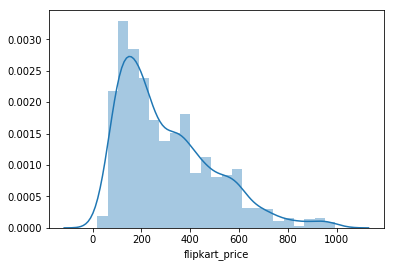

In [11]:
sns.distplot(flipkart[flipkart.flipkart_price<1000].flipkart_price)

In [15]:
flipkart.head()

,flipkart_author,flipkart_isbn10,flipkart_title,flipkart_ratings count,flipkart_price,flipkart_stars
0,Harari Yuval Noah,1784703931,Homo Deus,327,229,4.5
1,Yuval Noah Harari,1910701882,Homo Deus - A Brief History of Tomorrow,126,573,4.6
2,Aggarwal R. S.,9352534026,Quantitative Aptitude for Competitive Examina...,15052,427,4.4
3,unknown,9352535316,A Modern Approach to Verbal & Non-Verbal Reas...,1432,605,4.3
4,GKP,9388426843,RRB (Railway Recruitment Board) 2019 - Junior...,47,580,4.3


## Amazon ETL

In [47]:
csvs = [
#  'bestsellers.csv',
 'biography_books.csv',
 'books.csv',
 'children_books.csv',
 'comic_books.csv',
 'encyclopedia_books.csv',
 'gk_books.csv',
 'history_books.csv',
 'literature_books.csv',
 'science_books.csv',
 'self_help_books.csv']

In [48]:
list_ = []
for csv in csvs:
    print(csv)
    list_.append(pd.read_csv(csv, error_bad_lines=False))

biography_books.csv
books.csv
children_books.csv
comic_books.csv
encyclopedia_books.csv
gk_books.csv
history_books.csv
literature_books.csv
science_books.csv
self_help_books.csv


b'Skipping line 102: expected 8 fields, saw 12\nSkipping line 120: expected 8 fields, saw 9\nSkipping line 148: expected 8 fields, saw 9\nSkipping line 158: expected 8 fields, saw 9\nSkipping line 182: expected 8 fields, saw 9\nSkipping line 209: expected 8 fields, saw 10\nSkipping line 211: expected 8 fields, saw 9\nSkipping line 212: expected 8 fields, saw 9\nSkipping line 226: expected 8 fields, saw 9\nSkipping line 238: expected 8 fields, saw 9\nSkipping line 250: expected 8 fields, saw 9\n'
b'Skipping line 236: expected 8 fields, saw 9\nSkipping line 251: expected 8 fields, saw 9\nSkipping line 256: expected 8 fields, saw 9\nSkipping line 263: expected 8 fields, saw 9\nSkipping line 298: expected 8 fields, saw 9\n'
b'Skipping line 17: expected 8 fields, saw 9\nSkipping line 30: expected 8 fields, saw 9\nSkipping line 43: expected 8 fields, saw 9\nSkipping line 88: expected 8 fields, saw 9\nSkipping line 123: expected 8 fields, saw 9\nSkipping line 127: expected 8 fields, saw 9\nSk

In [49]:
amazon = pd.concat(list_)
amazon.head()
cols_to_drop = ['URL', 'Binding']
amazon.head()
amazon = amazon.drop(cols_to_drop, axis=1)
amazon.columns = ['amazon_' + col.strip().lower() for col in amazon.columns]

In [50]:
amazon['amazon_isbn-10'].nunique()

2515

In [53]:
def extract_price(price):    
    if price != price:
        return np.nan
    
    if isinstance(price, str):

        lprice = price.split(". ")
        if len(lprice) == 2:
            return lprice[1]

        if price[0].isdigit():
            return price
        else:
            return price[1:]
        
    elif isinstance(price, float):
        return str(price)
    elif isinstance(price, int):
        return str(price)
    else:
        print(price)
        np.nan

In [54]:
price = amazon.amazon_price.apply(extract_price)

In [55]:
something = set()
def func(string):
    if string != string:
        return np.nan

    if not isinstance(string, float) and '-' in string and not isinstance(string, int) and len(string) > 4:
        return np.nan
    
    if isinstance(string, str):
        if '.' in string and ',' in string:
            string = string.replace(',', '')
            return int(string.split('.')[0])
        elif '.' in string:
            return int(string.split('.')[0])
        elif ',' in string:
            return int(string.replace(',', ''))
        else:
            return int(string)
    else:
        return int(str)

In [56]:
amazon.amazon_price = price.apply(func)

In [57]:
amazon.head()

,amazon_title,amazon_author,amazon_rating,amazon_reviews count,amazon_isbn-10,amazon_price
0,Wings of Fire: An Autobiography of Abdul Kalam,by Arun Tiwari,4.6,2133.0,8173711461,194.0
1,Steve Jobs,by Walter Isaacson,4.6,693.0,034914043X,302.0
2,Mein Kampf,by Adolf Hitler,4.0,480.0,8172345429,89.0
3,Becoming,by Michelle Obama - Import,4.8,56.0,0241334144,835.0
4,Elon Musk: How the Billionaire CEO of Spacex a...,by Ashlee Vance,4.5,725.0,0753555638,343.0


In [58]:
amazon = amazon.drop(amazon[amazon.amazon_price.isna()].index, axis=0)

/home/isht3/anaconda3/envs/env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


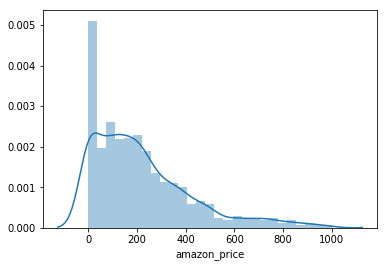

In [59]:
sns.distplot(amazon.amazon_price)

# Merge the Dataframes: Amazon and Flipkart

In [61]:
amazon_isbn = set(amazon['amazon_isbn-10'])
len(amazon_isbn)

2045

In [62]:
flipkart_isbn = set(flipkart.flipkart_isbn10)
len(flipkart_isbn)

1259

In [63]:
len(flipkart_isbn.intersection(amazon_isbn))

0